# Artigo 7 - Manga Recomendation
## Autor

Nome: Thiago Cerqueira Borges </br> 
Matricula: 190117508 </br>
Github: Thiago-Cerq </br>
---

| Hitórico de versão |    Data    |
|:------------------:|:----------:|
|      ver 1.0       | 20/11/2023 | 

---

# Introdução

Nesta lição, exploramos a construção de um modelo de recomendação, uma abordagem que se baseia nas interações dos usuários com produtos, filmes, vídeos, etc., para sugerir itens semelhantes que o usuário ainda não explorou. Agora, aplicaremos esses conceitos para criar um modelo de recomendação de animes usando o banco de dados "Anime Recommendation Database". Nosso foco estará nos conjuntos de dados "MAL Anime Top 10000 Details.csv" e "MAL Anime Recommendations 45k.csv", que fornecem uma lista de animes e as avaliações completas dos usuários para cada anime, respectivamente. Ao utilizar essas informações, buscaremos desenvolver um modelo capaz de oferecer recomendações personalizadas, levando em consideração as preferências dos usuários expressas por meio de suas interações com os animes.

# Imports

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai.collab import *
from fastai.tabular.all import *
import matplotlib.pyplot as plt
import seaborn as sns
set_seed(42)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mal-top-10k-anime-details/MAL Anime Top 10000 Details.csv
/kaggle/input/mal-top-10k-anime-details/MAL Anime Reviews 85k.csv
/kaggle/input/mal-top-10k-anime-details/MAL Anime Recommendations 45k.csv


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/lib/kaggle/gcp.py
/kaggle/input/mal-top-10k-anime-details/MAL Anime Top 10000 Details.csv
/kaggle/input/mal-top-10k-anime-details/MAL Anime Reviews 85k.csv
/kaggle/input/mal-top-10k-anime-details/MAL Anime Recommendations 45k.csv


# Tratamento de Dados

In [3]:
ratings_df = pd.read_csv('/kaggle/input/mal-top-10k-anime-details/MAL Anime Reviews 85k.csv')
ratings_df.head(1)

,Anime Rank,Anime Title,Anime URL,Username,Review Date,Episodes Watched,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,Review
0,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews,tazillo,"Jan 25, 2010",64 of 64 episodes seen,3464,10,10,9,9,10,10,"First of all, I have seen the original FMA and although it was very popular and original, the pacing and conclusion did not sit too well with me. Brotherhood is meant to be a remake of the original, this time sticking to the manga all the way through, but there were people who thought it would spoil the franchise. That myth should be dispelled, as there's only one word to describe this series - EPIC.\nI admit that as I've seen the original and read the manga, the pacing of Brotherhood seems to start off being VERY fast (I finally got used to the pacing after\nwatching the first fifteen eps..."


In [4]:
ratings_df = ratings_df.drop('Review', axis=1)
ratings_df.head(5)

,Anime Rank,Anime Title,Anime URL,Username,Review Date,Episodes Watched,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating
0,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews,tazillo,"Jan 25, 2010",64 of 64 episodes seen,3464,10,10,9,9,10,10
1,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews,Archaeon,"Nov 15, 2010",64 of 64 episodes seen,1311,9,8,9,9,9,9
2,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews,ChristopherKClaw,"Apr 7, 2015",64 of 64 episodes seen,1113,7,8,8,10,6,7
3,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews,literaturenerd,"Apr 25, 2015",64 of 64 episodes seen,704,7,8,8,8,8,8
4,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews,M0nkeyD_Luffy,"Jul 29, 2015",64 of 64 episodes seen,446,5,2,7,7,8,5


In [5]:
ratings_df['id_user'], _ = pd.factorize(ratings_df['Username'])

ratings_df.head(5)

,Anime Rank,Anime Title,Anime URL,Username,Review Date,Episodes Watched,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,id_user
0,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews,tazillo,"Jan 25, 2010",64 of 64 episodes seen,3464,10,10,9,9,10,10,0
1,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews,Archaeon,"Nov 15, 2010",64 of 64 episodes seen,1311,9,8,9,9,9,9,1
2,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews,ChristopherKClaw,"Apr 7, 2015",64 of 64 episodes seen,1113,7,8,8,10,6,7,2
3,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews,literaturenerd,"Apr 25, 2015",64 of 64 episodes seen,704,7,8,8,8,8,8,3
4,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews,M0nkeyD_Luffy,"Jul 29, 2015",64 of 64 episodes seen,446,5,2,7,7,8,5,4


In [6]:
ratings_df[ratings_df['id_user'] == 1]

,Anime Rank,Anime Title,Anime URL,Username,Review Date,Episodes Watched,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,id_user
1,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews,Archaeon,"Nov 15, 2010",64 of 64 episodes seen,1311,9,8,9,9,9,9,1
783,1025,Aria the Animation,https://myanimelist.net/anime/477/Aria_the_Animation/reviews,Archaeon,"Jan 3, 2008",13 of 13 episodes seen,890,9,8,9,10,9,9,1
1796,1054,Piano no Mori,https://myanimelist.net/anime/2594/Piano_no_Mori/reviews,Archaeon,"Apr 8, 2008",1 of 1 episodes seen,140,8,8,9,9,8,8,1
2176,1061,Taiyou no Ko Esteban,https://myanimelist.net/anime/1279/Taiyou_no_Ko_Esteban/reviews,Archaeon,"Sep 16, 2009",39 of 39 episodes seen,118,9,10,8,9,10,10,1
2491,1074,Top wo Nerae 2! Diebuster,https://myanimelist.net/anime/1002/Top_wo_Nerae_2_Diebuster/reviews,Archaeon,"Oct 27, 2009",6 of 6 episodes seen,236,8,7,8,8,7,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82681,886,Seto no Hanayome,https://myanimelist.net/anime/2104/Seto_no_Hanayome/reviews,Archaeon,"Nov 3, 2007",26 of 26 episodes seen,852,9,8,9,8,9,9,1
82933,895,Slayers,https://myanimelist.net/anime/534/Slayers/reviews,Archaeon,"Oct 16, 2009",26 of 26 episodes seen,255,8,8,7,7,8,8,1
83684,917,Kami nomi zo Shiru Sekai,https://myanimelist.net/anime/8525/Kami_nomi_zo_Shiru_Sekai/reviews,Archaeon,"Jan 28, 2011",12 of 12 episodes seen,339,7,7,7,8,7,8,1
84007,927,Tetsuwan Birdy Decode:02,https://myanimelist.net/anime/5074/Tetsuwan_Birdy_Decode_02/reviews,Archaeon,"Aug 11, 2009",12 of 12 episodes seen,203,9,8,10,9,8,9,1


In [7]:
animes = pd.read_csv("/kaggle/input/mal-top-10k-anime-details/MAL Anime Top 10000 Details.csv")
animes = animes.drop('Summary', axis=1)
animes.head(5)

,Anime Title,MAL Url,English,Japanese,Type,Episodes,Status,Aired,Premiered,Broadcast,...,Studios,Source,Genres,Duration,Rating,Score,Ranking,Popularity,Members,Favorites
0,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),...,Bones,Manga,"Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen",24 min. per ep.,R - 17+ (violence & profanity),9.22,1,4,2025613,167812
1,Steins;Gate,https://myanimelist.net/anime/9253/Steins_Gate,Steins;Gate,STEINS;GATE,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),...,White Fox,Visual novel,"Thriller, Sci-Fi",24 min. per ep.,PG-13 - Teens 13 or older,9.12,2,8,1636151,139909
2,Gintama°,https://myanimelist.net/anime/28977/Gintama°,Gintama Season 4,銀魂°,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18:00 (JST),...,Bandai Namco Pictures,Manga,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",24 min. per ep.,PG-13 - Teens 13 or older,9.11,3,330,363879,10353
3,Hunter x Hunter (2011),https://myanimelist.net/anime/11061/Hunter_x_Hunter_2011,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,TV,148,Finished Airing,"Oct 2, 2011 to Sep 24, 2014",Fall 2011,Sundays at 10:55 (JST),...,Madhouse,Manga,"Action, Adventure, Fantasy, Shounen, Super Power",23 min. per ep.,PG-13 - Teens 13 or older,9.11,4,14,1459320,130492
4,Ginga Eiyuu Densetsu,https://myanimelist.net/anime/820/Ginga_Eiyuu_Densetsu,Legend of the Galactic Heroes,銀河英雄伝説,OVA,110,Finished Airing,"Jan 8, 1988 to Mar 17, 1997",NaN,NaN,...,"Artland, Magic Bus",Novel,"Military, Sci-Fi, Space, Drama",26 min. per ep.,R - 17+ (violence & profanity),9.10,5,629,212162,13100


In [8]:
ranking_name = animes[['Ranking', 'English']]
ranking_name = ranking_name.rename(columns={'Ranking': 'id_anime', 'English': 'name'})
ranking_name.head(10)

,id_anime,name
0,1,Fullmetal Alchemist: Brotherhood
1,2,Steins;Gate
2,3,Gintama Season 4
3,4,Hunter x Hunter
4,5,Legend of the Galactic Heroes
5,6,Gintama Season 2
6,7,Attack on Titan Season 3 Part 2
7,8,Gintama: Enchousen
8,9,March Comes In Like A Lion 2nd Season
9,10,A Silent Voice


In [9]:
ratings_df = ratings_df.rename(columns={'Anime Title': 'name'})
ratings_df.head(10)

,Anime Rank,name,Anime URL,Username,Review Date,Episodes Watched,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,id_user
0,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews,tazillo,"Jan 25, 2010",64 of 64 episodes seen,3464,10,10,9,9,10,10,0
1,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews,Archaeon,"Nov 15, 2010",64 of 64 episodes seen,1311,9,8,9,9,9,9,1
2,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews,ChristopherKClaw,"Apr 7, 2015",64 of 64 episodes seen,1113,7,8,8,10,6,7,2
3,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews,literaturenerd,"Apr 25, 2015",64 of 64 episodes seen,704,7,8,8,8,8,8,3
4,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews,M0nkeyD_Luffy,"Jul 29, 2015",64 of 64 episodes seen,446,5,2,7,7,8,5,4
5,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews,ryuu_zer0,"Mar 2, 2010",64 of 64 episodes seen,241,9,10,9,8,10,10,5
6,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews,Reimei-Chan,"Oct 27, 2014",64 of 64 episodes seen,216,10,10,10,10,10,10,6
7,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews,Rurouni_Tidus,"Oct 9, 2009",26 of 64 episodes seen,196,10,10,10,8,9,10,7
8,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews,Malighos,"Apr 12, 2015",64 of 64 episodes seen,171,10,10,10,10,10,10,8
9,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews,bananapotato,"Apr 17, 2015",64 of 64 episodes seen,151,10,10,10,10,10,10,9


In [10]:
ratings_with_name_df = ratings_df.copy()
ratings_with_name_df = ratings_with_name_df.merge(ranking_name)
ratings_with_name_df = ratings_with_name_df.sample(frac=1)
ratings_with_name_df.head(20)

,Anime Rank,name,Anime URL,Username,Review Date,Episodes Watched,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,id_user,id_anime
12395,315,Fullmetal Alchemist,https://myanimelist.net/anime/121/Fullmetal_Alchemist/reviews?p=2,iAlkemy,"Apr 5, 2008",51 of 51 episodes seen,14,10,10,9,10,10,10,22864,315
18549,518,Log Horizon,https://myanimelist.net/anime/17265/Log_Horizon/reviews?p=3,SunnyYangL,"May 17, 2020",25 of 25 episodes seen,3,5,6,4,4,4,5,17628,518
4003,1660,High School DxD BorN,https://myanimelist.net/anime/24703/High_School_DxD_BorN/reviews,Zaku88,"Nov 22, 2015",12 of 12 episodes seen,6,7,6,8,7,6,8,207,1660
3184,1462,Flying Witch,https://myanimelist.net/anime/31376/Flying_Witch/reviews?p=2,raimodsu,"Mar 6, 2019",12 of 12 episodes seen,3,8,7,8,7,7,9,5164,1462
283,1025,Aria the Animation,https://myanimelist.net/anime/477/Aria_the_Animation/reviews?p=3,moe_sama,"Jan 16, 2020",13 of 13 episodes seen,2,10,6,8,8,7,8,703,1025
8801,2369,Gun x Sword,https://myanimelist.net/anime/411/Gun_x_Sword/reviews,Dekion,"Jun 6, 2010",26 of 26 episodes seen,11,9,10,10,10,10,9,17743,2369
12063,3036,MM!,https://myanimelist.net/anime/8424/MM/reviews,Savepoints,"Jun 24, 2013",2 of 12 episodes seen,9,4,3,7,6,5,3,6424,3036
11438,2866,Gunslinger Girl: Il Teatrino,https://myanimelist.net/anime/3231/Gunslinger_Girl__Il_Teatrino/reviews,phwraengck,"Jan 24, 2008",1 of 13 episodes seen,39,1,1,2,4,3,1,21102,2866
11587,2933,Knight's & Magic,https://myanimelist.net/anime/34104/Knights___Magic/reviews?p=2,AgileBanana,"Jul 26, 2017",3 of 13 episodes seen,3,4,8,5,5,3,4,21507,2933
8165,2290,Onihei,https://myanimelist.net/anime/33983/Onihei/reviews,Adi,"Apr 5, 2017",13 of 13 episodes seen,19,7,7,7,8,6,7,479,2290


In [11]:
ratings_with_name_df[ratings_with_name_df['id_anime'] == 1]

,Anime Rank,name,Anime URL,Username,Review Date,Episodes Watched,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,id_user,id_anime
44,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews?p=3,Lockensocke,"Mar 2, 2014",64 of 64 episodes seen,64,3,1,8,8,1,6,5159,1
34,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews?p=2,Replicalost,"May 18, 2015",64 of 64 episodes seen,76,10,10,9,8,10,10,14563,1
57,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews?p=3,The3rdWiseGuy,"Jul 15, 2014",64 of 64 episodes seen,43,9,10,9,9,10,10,14579,1
46,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews?p=3,Dotter,"Sep 6, 2011",64 of 64 episodes seen,61,10,10,9,9,10,10,14571,1
35,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews?p=2,erialc,"Nov 30, 2011",64 of 64 episodes seen,75,10,10,10,10,10,10,14564,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews,jacobjr1,"Nov 2, 2014",64 of 64 episodes seen,128,10,10,10,10,10,10,13,1
60,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews?p=4,BlokeTokes,"Sep 21, 2014",64 of 64 episodes seen,38,8,7,9,8,8,8,7099,1
77,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews?p=4,alitasbattlelist,"Jul 12, 2019",64 of 64 episodes seen,13,4,6,9,8,7,5,14591,1
55,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews?p=3,Remlarr,"Mar 23, 2015",64 of 64 episodes seen,46,10,10,10,10,10,10,14577,1


In [12]:
ratings_with_name_df.isnull().sum()

Anime Rank          0
name                0
Anime URL           0
Username            0
Review Date         0
Episodes Watched    0
Review Likes        0
Overall Rating      0
Story Rating        0
Animation Rating    0
Sound Rating        0
Character Rating    0
Enjoyment Rating    0
id_user             0
id_anime            0
dtype: int64

<Axes: >

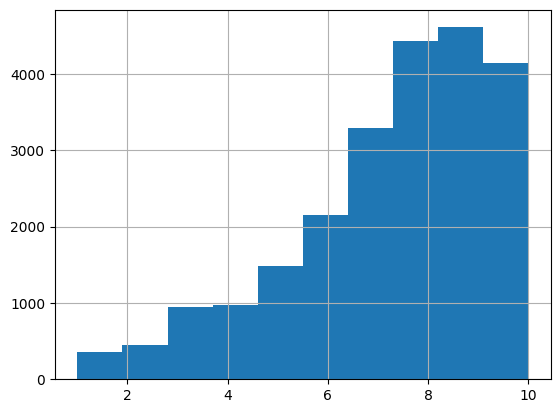

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

ratings_with_name_df['Overall Rating'].hist()

In [14]:
grouped_ratings = ratings_with_name_df[['id_anime', 'Overall Rating', 'name']].groupby('name')['Overall Rating'].agg(['mean', 'count'])
grouped_ratings.columns = ['media', 'total']
grouped_ratings = grouped_ratings.reset_index()
grouped_ratings.head(10)

,name,media,total
0,.hack//G.U. Trilogy,5.142857,7
1,.hack//Sign,6.761905,63
2,07-Ghost,7.383562,73
3,22-Jul,6.833333,18
4,3x3 Eyes,7.818182,11
5,91 Days,7.962500,80
6,A Day Before Us,8.000000,1
7,A-Channel,7.228571,35
8,A-Channel: +A-Channel,6.500000,6
9,A3! Season Spring & Summer,7.071429,14


In [15]:
top_20_anime = grouped_ratings.loc[grouped_ratings['total'] > 50].nlargest(20, columns=['media', 'total'])
top_20_anime

,name,media,total
39,Aria the Origination,9.185185,54
356,Mononoke,9.015385,65
190,Great Teacher Onizuka,8.961538,78
464,Skip Beat!,8.945205,73
80,Cardcaptor Sakura,8.910256,78
162,Fullmetal Alchemist,8.884615,78
379,Nodame Cantabile,8.880000,75
381,Non Non Biyori,8.860759,79
94,Cross Game,8.855072,69
417,Princess Tutu,8.822785,79


# Criando dataloaders


In [16]:
ratings_with_name_df

,Anime Rank,name,Anime URL,Username,Review Date,Episodes Watched,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,id_user,id_anime
12395,315,Fullmetal Alchemist,https://myanimelist.net/anime/121/Fullmetal_Alchemist/reviews?p=2,iAlkemy,"Apr 5, 2008",51 of 51 episodes seen,14,10,10,9,10,10,10,22864,315
18549,518,Log Horizon,https://myanimelist.net/anime/17265/Log_Horizon/reviews?p=3,SunnyYangL,"May 17, 2020",25 of 25 episodes seen,3,5,6,4,4,4,5,17628,518
4003,1660,High School DxD BorN,https://myanimelist.net/anime/24703/High_School_DxD_BorN/reviews,Zaku88,"Nov 22, 2015",12 of 12 episodes seen,6,7,6,8,7,6,8,207,1660
3184,1462,Flying Witch,https://myanimelist.net/anime/31376/Flying_Witch/reviews?p=2,raimodsu,"Mar 6, 2019",12 of 12 episodes seen,3,8,7,8,7,7,9,5164,1462
283,1025,Aria the Animation,https://myanimelist.net/anime/477/Aria_the_Animation/reviews?p=3,moe_sama,"Jan 16, 2020",13 of 13 episodes seen,2,10,6,8,8,7,8,703,1025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,300,Death Parade,https://myanimelist.net/anime/28223/Death_Parade/reviews?p=3,YourPalCthulhu,"Apr 1, 2015",12 of 12 episodes seen,11,7,7,8,6,6,8,17904,300
21575,831,Claymore,https://myanimelist.net/anime/1818/Claymore/reviews?p=2,thiago_pagogna,"Sep 4, 2009",26 of 26 episodes seen,9,10,0,0,0,0,0,15858,831
5390,19,Mob Psycho 100 II,https://myanimelist.net/anime/37510/Mob_Psycho_100_II/reviews?p=2,triguned,"Feb 27, 2019",7 of 13 episodes seen,16,10,10,10,8,10,10,1440,19
860,1118,Romeo x Juliet,https://myanimelist.net/anime/1699/Romeo_x_Juliet/reviews,AgentBEATS,"Jun 14, 2011",24 of 24 episodes seen,9,8,6,8,10,7,10,3227,1118


In [17]:
pivot_table = pd.pivot_table(ratings_with_name_df.iloc[:500], columns='Username', values='Overall Rating', index='name', fill_value=0)
pivot_table

Username,-Taicho-,0ncetwlce,1cherrybomb1,2Daggers,3dnanoo94,Adi,AgentBishop,AgileBanana,Airbent,Akaelda,...,veemon23,winfoharso,winfy,wingz00,wumbmasta,xiaoxin,yaya-d,ycart59,zawa113,zerorider
name,,,,,,,,,,,,,,,,,,,,,
.hack//Sign,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,0,0
07-Ghost,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3x3 Eyes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91 Days,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A-Channel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Witchblade,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wolf's Rain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zegapain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
max_ratings = 500_000
limited_ratings = ratings_with_name_df.iloc[:max_ratings]

In [30]:
ratings_with_name_df

,Anime Rank,name,Anime URL,Username,Review Date,Episodes Watched,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,id_user,id_anime
12395,315,Fullmetal Alchemist,https://myanimelist.net/anime/121/Fullmetal_Alchemist/reviews?p=2,iAlkemy,"Apr 5, 2008",51 of 51 episodes seen,14,10,10,9,10,10,10,22864,315
18549,518,Log Horizon,https://myanimelist.net/anime/17265/Log_Horizon/reviews?p=3,SunnyYangL,"May 17, 2020",25 of 25 episodes seen,3,5,6,4,4,4,5,17628,518
4003,1660,High School DxD BorN,https://myanimelist.net/anime/24703/High_School_DxD_BorN/reviews,Zaku88,"Nov 22, 2015",12 of 12 episodes seen,6,7,6,8,7,6,8,207,1660
3184,1462,Flying Witch,https://myanimelist.net/anime/31376/Flying_Witch/reviews?p=2,raimodsu,"Mar 6, 2019",12 of 12 episodes seen,3,8,7,8,7,7,9,5164,1462
283,1025,Aria the Animation,https://myanimelist.net/anime/477/Aria_the_Animation/reviews?p=3,moe_sama,"Jan 16, 2020",13 of 13 episodes seen,2,10,6,8,8,7,8,703,1025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,300,Death Parade,https://myanimelist.net/anime/28223/Death_Parade/reviews?p=3,YourPalCthulhu,"Apr 1, 2015",12 of 12 episodes seen,11,7,7,8,6,6,8,17904,300
21575,831,Claymore,https://myanimelist.net/anime/1818/Claymore/reviews?p=2,thiago_pagogna,"Sep 4, 2009",26 of 26 episodes seen,9,10,0,0,0,0,0,15858,831
5390,19,Mob Psycho 100 II,https://myanimelist.net/anime/37510/Mob_Psycho_100_II/reviews?p=2,triguned,"Feb 27, 2019",7 of 13 episodes seen,16,10,10,10,8,10,10,1440,19
860,1118,Romeo x Juliet,https://myanimelist.net/anime/1699/Romeo_x_Juliet/reviews,AgentBEATS,"Jun 14, 2011",24 of 24 episodes seen,9,8,6,8,10,7,10,3227,1118


In [42]:
id_user = 1234

rows = []
animes = ["Fullmetal Alchemist", "Mob Psycho 100 II", 'Bleahc', 'Vinland Saga', 'Death Note']
ratings = [10, 9, 10, 10, 10]
def add_user_ratings_to_df(df, id_user, animes, ratings):
    for a_anime, a_rating in zip(animes, ratings):
        # anime_id é sempre 1 pois a coluna não será levada em conta a frente.
        rows.append( dict( {'id_anime': 1, 'name' : a_anime, 'id_user' : user_id, 'Overall Rating' : a_rating}))
    user_data = pd.DataFrame(rows)
    return pd.concat([limited_ratings, user_data], axis=0)
    
ratings_with_user_data = add_user_ratings_to_df(limited_ratings, user_id, animes, ratings)
ratings_with_user_data.tail()

,Anime Rank,name,Anime URL,Username,Review Date,Episodes Watched,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,id_user,id_anime
0,NaN,Fullmetal Alchemist,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,1234,1
1,NaN,Mob Psycho 100 II,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,1234,1
2,NaN,Bleahc,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,1234,1
3,NaN,Vinland Saga,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,1234,1
4,NaN,Death Note,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,1234,1


In [37]:
ratings_with_user_data.fillna(0, inplace=True)

In [49]:
ratings_with_user_data['id_user'] = ratings_with_user_data['id_user'].astype(int)
ratings_with_user_data['id_anime'] = ratings_with_user_data['id_anime'].astype(int)
ratings_with_user_data['rating'] = ratings_with_user_data['Overall Rating'].astype(float)

In [50]:
dls = CollabDataLoaders.from_df(ratings_with_user_data, item_name='id_anime', user_name='id_user', rating_name='Overall Rating', bs=4096)
dls.show_batch()

,id_user,id_anime,Overall Rating
0,22806,3153,5
1,15286,2076,8
2,34557,93,6
3,1788,1506,9
4,24345,3406,7
5,11938,1906,10
6,6762,3705,2
7,774,1025,7
8,7850,2888,9
9,2499,526,7


# Treinando os modelos

In [60]:
n_users  = len(dls.classes['id_user'])
n_animes = len(dls.classes['id_anime'])
n_users, n_animes

(11114, 569)

In [61]:
class DotProduct(Module):
    def __init__(self, n_users, n_animes, n_factors):
        self.user_factors = Embedding(n_users, n_factors)
        self.anime_factors = Embedding(n_animes, n_factors)
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        animes = self.anime_factors(x[:,1])
        return (users * animes).sum(dim=1)

In [63]:
model = DotProduct(n_users, n_animes, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())

In [64]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,time
0,60.082436,59.929714,00:00
1,60.146847,59.929775,00:00
2,60.137718,59.929749,00:00
3,60.184368,59.929672,00:00
4,60.177937,59.929653,00:00


In [65]:
class DotProductBias(Module):
    def __init__(self, n_users, n_animes, n_factors, y_range=(0,10.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.user_bias = Embedding(n_users, 1)
        self.anime_factors = Embedding(n_animes, n_factors)
        self.anime_bias = Embedding(n_animes, 1)
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        animes = self.anime_factors(x[:,1])
        res = (users * animes).sum(dim=1, keepdim=True)
        res += self.user_bias(x[:,0]) + self.anime_bias(x[:,1])
        return sigmoid_range(res, *self.y_range)

In [73]:
model = DotProductBias(n_users, n_animes, 200)
learn_200fac = Learner(dls, model, loss_func=MSELossFlat())
learn_200fac.fit_one_cycle(10, 5e-3)

epoch,train_loss,valid_loss,time
0,9.669330,9.584516,00:00
1,9.625582,9.460181,00:00
2,9.499667,9.234472,00:00
3,9.251518,8.967544,00:00
4,8.842096,8.697284,00:00
5,8.291808,8.466539,00:00
6,7.681836,8.302208,00:00
7,7.092141,8.206607,00:00
8,6.570848,8.166721,00:00
9,6.138297,8.159608,00:00


# Testando o modelo

In [74]:
learn_200fac.save("trained_model")

Path('models/trained_model.pth')

In [93]:
learn_200fac.export('model.pkl')

In [75]:
rows = []
anime_names = list(ratings_with_user_data.drop_duplicates(subset='name', keep='first').name)
for i in range(len(anime_names)):
    rows.append( dict({'id_user' : 12345678, 'id_anime': anime_names[i]}))
test_data = pd.DataFrame(rows)
# Load your model


dl = learn_200fac.dls.test_dl(test_data)

In [80]:
preds, y = learn_200fac.get_preds(dl=dl);
preds, y;

In [81]:
# merge predictions with names
preds_df = pd.DataFrame({
    'item': anime_names,
    'prediction': preds.numpy().flatten()
}).sort_values('prediction', ascending=False)

# show top 10 ratings
display(preds_df[:20])

,item,prediction
0,Fullmetal Alchemist,5.217566
376,Hetalia Axis Powers,5.217566
370,Bamboo Blade,5.217566
371,Kamichu!,5.217566
372,Buddy Complex,5.217566
373,Vampire Knight: Guilty,5.217566
374,Blood+,5.217566
375,Tiger Mask W,5.217566
377,Punch Line,5.217566
368,Love Live! Sunshine!!,5.217566


In [82]:
pivot_table.index, pivot_table.columns

(Index(['.hack//Sign', '07-Ghost', '3x3 Eyes', '91 Days', 'A-Channel',
        'A3! Season Spring & Summer', 'AKB0048', 'AKB0048: Next Stage',
        'Accel World', 'Afro Samurai: Resurrection',
        ...
        'Utawarerumono', 'Vampire Hunter D', 'Vampire Knight',
        'Violet Evergarden', 'White Album 2', 'Witchblade', 'Wolf's Rain',
        'Zegapain', 'Zombie-Loan', 'xxxHOLiC'],
       dtype='object', name='name', length=277),
 Index(['-Taicho-', '0ncetwlce', '1cherrybomb1', '2Daggers', '3dnanoo94', 'Adi',
        'AgentBishop', 'AgileBanana', 'Airbent', 'Akaelda',
        ...
        'veemon23', 'winfoharso', 'winfy', 'wingz00', 'wumbmasta', 'xiaoxin',
        'yaya-d', 'ycart59', 'zawa113', 'zerorider'],
       dtype='object', name='Username', length=476))

In [90]:
# Load your model
def get_user_predicts(id_user):
    test_data = {}
    rows = []
    for i in range(len(pivot_table.index)):
        rows.append( dict({'id_user' : id_user, 'id_anime': pivot_table.index[i]}))    

    test_data = pd.DataFrame(rows)
    dl = learn_200fac.dls.test_dl(test_data)
    preds, y = learn_200fac.get_preds(dl=dl)
    return preds

users = pivot_table.columns
for idx, user in enumerate(users):
    user_predictions = get_user_predicts(user)
    print(f"{idx+1}: usuário - {user}")
    user_preds_flatten = user_predictions.numpy().flatten().round(2)
    pivot_table[user] = user_preds_flatten;

1: usuário - -Taicho-


2: usuário - 0ncetwlce


3: usuário - 1cherrybomb1


4: usuário - 2Daggers


5: usuário - 3dnanoo94


6: usuário - Adi


7: usuário - AgentBishop


8: usuário - AgileBanana


9: usuário - Airbent


10: usuário - Akaelda


11: usuário - Akira_Tsukino


12: usuário - Alloush


13: usuário - Aluvis


14: usuário - Andre_Alexander


15: usuário - AnimeFan500


16: usuário - AnimeViewerJ


17: usuário - Animelover820


18: usuário - Anthony_DiGrande


19: usuário - Apdo1


20: usuário - Arcanon


21: usuário - Archaeon


22: usuário - AriSecrets


23: usuário - Asfaria


24: usuário - Assthete


25: usuário - Atik12


26: usuário - Atman


27: usuário - AzureNatlis99


28: usuário - BabyGirl06301


29: usuário - Bachiatari


30: usuário - Baddie007


31: usuário - BanjoTheBear


32: usuário - Bear1211


33: usuário - Belinda


34: usuário - Bigbone99


35: usuário - Bishonenking88


36: usuário - Bishounen_Hunter


37: usuário - Black2knight


38: usuário - BleachedSoul


39: usuário - Blood_Diver_A


40: usuário - BlueAlexander93


41: usuário - Bluegojoe


42: usuário - BoaCC


43: usuário - Bolt1984


44: usuário - BranGor


45: usuário - Brian333


46: usuário - BrightLight


47: usuário - Bushou


48: usuário - Buster01


49: usuário - Caenn


50: usuário - Can_Draw_MH


51: usuário - Candalance


52: usuário - CarlZoldyck


53: usuário - CarlosAlbertoShk


54: usuário - Cat


55: usuário - CecaniahCorabele


56: usuário - ChaoticThinker


57: usuário - Charmelia_E


58: usuário - ClaritaNox


59: usuário - CodeBlazeFate


60: usuário - CovetCloud


61: usuário - CuriousButton


62: usuário - Curlyawesomeace


63: usuário - DJNOSTYLE


64: usuário - Dai_to


65: usuário - Danim3


66: usuário - DarkRavie


67: usuário - DarknessReality


68: usuário - Darmaiad


69: usuário - DarthInvader


70: usuário - Darvus_Laan


71: usuário - Dashiawia


72: usuário - DaxtotheMax


73: usuário - Deago


74: usuário - Dekion


75: usuário - Demo-kun


76: usuário - DensetsuNoJack


77: usuário - DerOkashi


78: usuário - Der_Reichter


79: usuário - DolbyThX


80: usuário - DragonsWhip


81: usuário - DryBread


82: usuário - Ellenwitch


83: usuário - ElohimCrimson


84: usuário - Emilia_Tsk


85: usuário - EteheralForm


86: usuário - Evangelion2014


87: usuário - Evil_Genius


88: usuário - FAKEANIMEGIRL


89: usuário - Falco2424


90: usuário - Faust721


91: usuário - Firechick12012


92: usuário - Firlian


93: usuário - Flawfinder


94: usuário - Florete


95: usuário - Forbidforbid


96: usuário - Foxygirl05


97: usuário - FreakenThomas


98: usuário - Fuckzenc


99: usuário - FullmetalCowboy


100: usuário - GameMasterGary


101: usuário - GeeksOasis


102: usuário - GonzoLewd


103: usuário - Gordn1


104: usuário - GreenEmu


105: usuário - GuUguk


106: usuário - GundamSFS


107: usuário - Gundroog


108: usuário - Gutshot


109: usuário - HaXXspetten


110: usuário - Half-Gifts


111: usuário - Halo_Crystal


112: usuário - HardToName


113: usuário - Harisrox


114: usuário - HarryPness


115: usuário - HatchetGirl


116: usuário - HectorLawliet


117: usuário - Hectotane


118: usuário - HeyYouPikachu


119: usuário - HidamariSeashore


120: usuário - Hikki_Senpai


121: usuário - Hiyonin


122: usuário - Hunterconnor


123: usuário - Huntsman


124: usuário - HybridMedia


125: usuário - Hyduk87


126: usuário - IAmDarkNemesis


127: usuário - Identity


128: usuário - IkarugaOne


129: usuário - Irony-Dream


130: usuário - IsaiahNV


131: usuário - ItIsIDio


132: usuário - Ixact


133: usuário - JMIDDLETON15


134: usuário - JPS02


135: usuário - J_k_L


136: usuário - JackCox


137: usuário - Jaermis


138: usuário - Jamjars_the_3rd


139: usuário - JayDeeThree


140: usuário - Jephthah


141: usuário - Jesswem


142: usuário - Joby05


143: usuário - Joe_Devaney


144: usuário - JonGall


145: usuário - JoshTheGayReal


146: usuário - Juarez


147: usuário - JudgeRuthless


148: usuário - Jylius


149: usuário - Kagehina1009


150: usuário - KanghisKhan


151: usuário - Kanokari


152: usuário - Kaoru282


153: usuário - Karhu


154: usuário - KatiaMarinMK


155: usuário - Kazzz2433


156: usuário - Ke_trab


157: usuário - Keatle


158: usuário - Kenny_1923


159: usuário - Kere


160: usuário - KillerKelaidis


161: usuário - King_Of_Light


162: usuário - KomanoOhta


163: usuário - Kurimu-chan


164: usuário - LeFlower-kun


165: usuário - Lindle


166: usuário - LoveArrowShooto


167: usuário - LovexTami


168: usuário - Lydiia


169: usuário - MMMizuki28


170: usuário - MachinaEm


171: usuário - Maddy-tan


172: usuário - Majorohminus


173: usuário - Manthors


174: usuário - MarlyTT


175: usuário - Marquis_D_Luffy


176: usuário - MasiTronXIII


177: usuário - Master10K


178: usuário - Mediwitch12


179: usuário - MegaArmaldo


180: usuário - MentalityCMS


181: usuário - MiRaD


182: usuário - Micsupreeme


183: usuário - Milk-plus__


184: usuário - Mister-MF


185: usuário - MisterSaur


186: usuário - Mixxu


187: usuário - MoeKaiser


188: usuário - Moe_


189: usuário - MonroeAnime


190: usuário - MouradSME


191: usuário - Mpolo98


192: usuário - MrGaz


193: usuário - MrOnsen


194: usuário - MrSpenfo


195: usuário - Muan142


196: usuário - MudanTV


197: usuário - Mugiwara-Pyon


198: usuário - MurderofCrows13


199: usuário - Mylaerla


200: usuário - Nashi_Nashi


201: usuário - Natsuaki


202: usuário - NemesisReaperX


203: usuário - Nervin


204: usuário - NeverKnowsBest26


205: usuário - NguyenSenpai


206: usuário - Nigami_Shin


207: usuário - NiqueNique


208: usuário - Nyren


209: usuário - OVERPOWERED99


210: usuário - OdysseusUlysses


211: usuário - Omnimaniac


212: usuário - Oofouchiemybones


213: usuário - OpheliaWolfgang


214: usuário - OppaiHerminator


215: usuário - Orrinoco


216: usuário - OtAkU_TaBiB


217: usuário - Pan-Ko


218: usuário - ParaParaJMo


219: usuário - ParadiseLost


220: usuário - Phantom121c


221: usuário - Phileap


222: usuário - Pipe


223: usuário - PixelTune


224: usuário - PokeHugo


225: usuário - Polyphemus


226: usuário - Poofypeach


227: usuário - Popaglockin


228: usuário - PowerUpOrDie


229: usuário - PrincessJAM


230: usuário - Proudsnax


231: usuário - Pyrowombat


232: usuário - Quiddity131


233: usuário - REC3


234: usuário - REMOVEDACC1234


235: usuário - Rakuen42


236: usuário - RanaHashir453


237: usuário - Random45


238: usuário - Recynon


239: usuário - Redache


240: usuário - Relaxel


241: usuário - Renix44


242: usuário - RomComBomb


243: usuário - RomaVictor43


244: usuário - Romantic19


245: usuário - Roy_Mustache


246: usuário - Ryuu_sama


247: usuário - SNKFanboy


248: usuário - SaiCRPG


249: usuário - SaltyShoebill


250: usuário - SamFury


251: usuário - Savepoints


252: usuário - ShaIIot


253: usuário - ShadowBlazer3000


254: usuário - ShadowTrainer


255: usuário - Shaja


256: usuário - Shingster


257: usuário - Shinji_Koizumi


258: usuário - ShiroHimura


259: usuário - ShiroKuran3812


260: usuário - Shockwave


261: usuário - Showatt


262: usuário - Shura-shurato


263: usuário - Sidewinder51


264: usuário - Singolo


265: usuário - Skadi


266: usuário - Skedofaux


267: usuário - SleepySRH


268: usuário - SlimMagoo


269: usuário - Social_Elitist


270: usuário - SolidousJohn23


271: usuário - Solista


272: usuário - Sonicfanx1


273: usuário - Soodak1998


274: usuário - SoumaK


275: usuário - Splitter


276: usuário - Spudnspud


277: usuário - Star-Dazzle


278: usuário - Stark700


279: usuário - Steve_in_Toronto


280: usuário - Stranger_Hanyo


281: usuário - SunnyYangL


282: usuário - Swagstorm


283: usuário - TRI_Mike


284: usuário - Tacas


285: usuário - TakamakiJoker


286: usuário - Tanta


287: usuário - Teerack


288: usuário - Ten_Kun


289: usuário - Teriuchi


290: usuário - Thaiberium


291: usuário - TheAzureSky


292: usuário - TheDeedsOfMen


293: usuário - TheKondor876


294: usuário - TisyaZEA


295: usuário - TokyoSanchez


296: usuário - Toto_Senpai


297: usuário - TraparDensity


298: usuário - TrashDax


299: usuário - Tune339


300: usuário - Tydus


301: usuário - VanAlex


302: usuário - Vegiroth


303: usuário - Venneh


304: usuário - Veronin


305: usuário - VictoryDragon


306: usuário - Volfenstein


307: usuário - VyseN


308: usuário - War_lothar


309: usuário - Whiskeyjack1k


310: usuário - WildNeptune


311: usuário - WizzerKrizzer


312: usuário - Wynter_Star


313: usuário - Xiaraith


314: usuário - XxThageXx


315: usuário - Yagami


316: usuário - Yakamin


317: usuário - Yamanashi_Ken


318: usuário - Yoosa


319: usuário - YoungChigga


320: usuário - Yukariki


321: usuário - Yuusa


322: usuário - ZackNero03


323: usuário - Zaku88


324: usuário - ZelxWeeb


325: usuário - ZeroReq011


326: usuário - Zerviscos


327: usuário - _Kay


328: usuário - aarelf


329: usuário - abcitsv


330: usuário - ajaxdin


331: usuário - akiwii


332: usuário - alcavey


333: usuário - aldero


334: usuário - amandasparkles


335: usuário - angelsreview


336: usuário - animan095


337: usuário - arleneim


338: usuário - atsarmo


339: usuário - awerture


340: usuário - barcaman101


341: usuário - bardanime


342: usuário - bleachsai


343: usuário - brynolf


344: usuário - captjoe213


345: usuário - cardin


346: usuário - chaodeknoi


347: usuário - chighsour


348: usuário - chiisaihimawari


349: usuário - chrisA15


350: usuário - clannadlove


351: usuário - clarkmoinkster


352: usuário - czxcjx


353: usuário - daisyfang4


354: usuário - danbert2


355: usuário - deoxys101


356: usuário - doom19876


357: usuário - dublincore


358: usuário - dwanex


359: usuário - eltonsu999


360: usuário - emojipiggie


361: usuário - englicana


362: usuário - eskimoseb


363: usuário - ethann


364: usuário - femto999


365: usuário - fluffyindrag


366: usuário - game8910


367: usuário - ggultra2764


368: usuário - gohjedrek


369: usuário - guilts51


370: usuário - hexashadow13


371: usuário - hitanyan


372: usuário - holdenn


373: usuário - iAlkemy


374: usuário - iSuckAtWriting


375: usuário - infinity


376: usuário - internetotaku


377: usuário - ismichi


378: usuário - jadyjads


379: usuário - jamattack


380: usuário - jayvwrites27


381: usuário - jbiscuits1


382: usuário - jiroutachi


383: usuário - josenewtype


384: usuário - jzathejenius


385: usuário - jzmcdaisy2112


386: usuário - kanon-chan


387: usuário - kawaiiprods


388: usuário - kazykoki


389: usuário - kekekeKaj


390: usuário - khfisum


391: usuário - kidbaxter


392: usuário - killerrbee


393: usuário - kirinnachan


394: usuário - kitten320


395: usuário - kittenkissesxoxo


396: usuário - kokuborou


397: usuário - ktulu007


398: usuário - kyle8998


399: usuário - kyousukeOkarin


400: usuário - lawlmartz


401: usuário - lebannen


402: usuário - literaturenerd


403: usuário - little_bat


404: usuário - lolwutwhatever


405: usuário - lulukohime


406: usuário - malikkkk27_


407: usuário - mandi92


408: usuário - melodyvonshewk


409: usuário - mickaelaria


410: usuário - middleground4471


411: usuário - mikawa


412: usuário - misha0angel


413: usuário - mkzxwing


414: usuário - moe_sama


415: usuário - moonkingdomify


416: usuário - moshpits


417: usuário - mouthpiece


418: usuário - mpdissonance


419: usuário - mrsKWON


420: usuário - msercert


421: usuário - murut87


422: usuário - mushimk


423: usuário - nekobob


424: usuário - neromh


425: usuário - peterg


426: usuário - philip1114


427: usuário - phwraengck


428: usuário - pk8list


429: usuário - post_human


430: usuário - princessakura


431: usuário - priyantotantowi


432: usuário - quincentuple


433: usuário - raimodsu


434: usuário - ramenpucci


435: usuário - ratchet573


436: usuário - reb3llist


437: usuário - redmoon_wolf


438: usuário - requiem


439: usuário - rmmr111


440: usuário - robert788


441: usuário - robo731


442: usuário - rweqoiu


443: usuário - s4kur4sluvy4ng


444: usuário - sashimee-kenna


445: usuário - seal308


446: usuário - serowenczak


447: usuário - shabahdaniah


448: usuário - shaishai404


449: usuário - shimokitazawa


450: usuário - shiroanna


451: usuário - skullhunterj


452: usuário - slash55


453: usuário - sliverofdivinity


454: usuário - slpless


455: usuário - smathels


456: usuário - tarochii


457: usuário - tb0ne


458: usuário - tesora


459: usuário - thegl25


460: usuário - themegamancave


461: usuário - thenhk


462: usuário - tramontina


463: usuário - tsukiichii


464: usuário - tukky12


465: usuário - unimportantuser


466: usuário - vPickles


467: usuário - veemon23


468: usuário - winfoharso


469: usuário - winfy


470: usuário - wingz00


471: usuário - wumbmasta


472: usuário - xiaoxin


473: usuário - yaya-d


474: usuário - ycart59


475: usuário - zawa113


476: usuário - zerorider


In [91]:
pivot_table

Username,-Taicho-,0ncetwlce,1cherrybomb1,2Daggers,3dnanoo94,Adi,AgentBishop,AgileBanana,Airbent,Akaelda,...,veemon23,winfoharso,winfy,wingz00,wumbmasta,xiaoxin,yaya-d,ycart59,zawa113,zerorider
name,,,,,,,,,,,,,,,,,,,,,
.hack//Sign,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,...,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22
07-Ghost,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,...,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22
3x3 Eyes,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,...,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22
91 Days,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,...,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22
A-Channel,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,...,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Witchblade,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,...,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22
Wolf's Rain,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,...,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22
Zegapain,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,...,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22


# Conclusão

Foi intrigante empreender na construção de um modelo de recomendação utilizando filtros colaborativos, contudo, deparei-me com diversas complexidades no conjunto de dados. Desafios como problemas de codificação de linguagem, a presença de valores de avaliação expressos como objetos ao invés de numéricos na coluna de ratings, e a incompatibilidade do DataLoader com dados não numéricos exigiram adaptações meticulosas. Além disso, durante a aplicação do modelo com produto escalar, um obstáculo adicional surgiu quando o primeiro ciclo de treinamento consumiu uma hora considerável. No HuggingFace App, ao solicitar sugestões, encontrei um erro. Em resumo, a jornada foi simultaneamente desafiadora e prazerosa ao explorar filtros colaborativos e os intricados nuances dos gradientes descendentes. Infelizmente não converge.

## Link para acessar a aplicação no p Hugging Face 🤗
​
https://huggingface.co/spaces/Thiago-Cerq/Anime_Recommendation
​
# Referências
​
Jeremy Howard and Sylvain Gugge. FastBook. Disponível em https://github.com/fastai/fastbook. Acessado e 04 de Dezembro de 2023.
​

Repositorio da Disciplina Disponível em https://github.com/fabraz/fastaiOnCampus. Acessado e 04 de Dezembro de 2023.